In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
from sklearn.model_selection import train_test_split as tts

In [5]:
from sklearn.preprocessing import StandardScaler

In [27]:
# feature selection method select KBest
from  sklearn.feature_selection import SelectKBest,f_classif

In [7]:
df=pd.read_csv('cancer.csv')

In [8]:
df.sample(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
502,91505,B,12.54,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,...,21.40,86.67,552.0,0.15800,0.17510,0.1889,0.08411,0.3155,0.07538,NaN
426,907409,B,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,...,21.57,81.41,440.4,0.13270,0.29960,0.2939,0.09310,0.3020,0.09646,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
182,873701,M,15.70,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.05189,...,32.82,129.30,1269.0,0.14140,0.35470,0.2902,0.15410,0.3437,0.08631,NaN


In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [23]:
df.drop(['Unnamed: 32'], axis=1,inplace=True)

In [24]:
df.sample(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
481,1,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.020700,0.1579,...,16.41,26.42,104.40,830.5,0.1064,0.1415,0.167300,0.08150,0.2356,0.07603
327,1,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,...,13.07,22.25,82.74,523.4,0.1013,0.0739,0.007732,0.02796,0.2171,0.07037
341,1,9.606,16.84,61.64,280.5,0.08481,0.09228,0.084220,0.022920,0.2036,...,10.75,23.07,71.25,353.6,0.1233,0.3416,0.434100,0.08120,0.2982,0.09825
438,1,13.850,19.60,88.68,592.6,0.08684,0.06330,0.013420,0.022930,0.1555,...,15.63,28.01,100.90,749.1,0.1118,0.1141,0.047530,0.05890,0.2513,0.06911


In [12]:
df.replace({'M':0,'B':1},inplace=True)

In [13]:
# df.info()

In [31]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

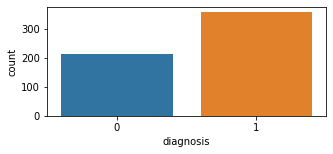

In [15]:
plt.figure(figsize=(5,2))
sns.countplot(x='diagnosis',data=df)

In [16]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [26]:
# none any nan value
#  df.isnull().sum() 

In [33]:
x=df.drop(['diagnosis'],axis=1)

In [34]:
y=df['diagnosis']

In [36]:
#  not show any nan value
# x.isnull().sum()  # x,y  Clear

=using SelectKBest method for feauture selection method , selectkbest use f_classif function to find best features , where
f_classif uses ANOVA Test


In [37]:
best_feature=SelectKBest(score_func=f_classif,k=22)

In [38]:
fit=best_feature.fit(x,y)

In [39]:
df_scores=pd.DataFrame(fit.scores_)

In [ ]:
# d=pd.DataFrame(fit.scores_ , columns=['score'])

In [ ]:
# c=pd.DataFrame(x.columns,columns=['features'])

In [40]:
col=pd.DataFrame(x.columns)

In [41]:
feature=pd.concat([col,df_scores],axis=1)

In [42]:
feature.columns=['features_name','score']

In [43]:
feature.sample(5)

,features_name,score
4,smoothness_mean,83.651123
6,concavity_mean,533.793126
19,fractal_dimension_se,3.468275
11,texture_se,0.039095
12,perimeter_se,253.897392


In [44]:
df1=feature.nlargest(22,'score')

In [46]:
df1.sample(6)

,features_name,score
28,symmetry_worst,118.860232
5,compactness_mean,313.233079
23,area_worst,661.600206
27,concave points_worst,964.385393
6,concavity_mean,533.793126
13,area_se,243.651586


In [47]:
df1.reset_index(drop=True,inplace=True)

In [48]:
df1.head(3)

,features_name,score
0,concave points_worst,964.385393
1,perimeter_worst,897.944219
2,concave points_mean,861.676020


In [49]:
df1.features_name.unique()

array(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean',
       'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se',
       'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'texture_mean', 'concave points_se',
       'smoothness_mean', 'symmetry_mean'], dtype=object)

In [50]:
X=x[['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean',
       'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se',
       'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'texture_mean', 'concave points_se',
       'smoothness_mean', 'symmetry_mean']]

In [51]:
sc=StandardScaler()

In [52]:
xscale = sc.fit_transform(X)

In [53]:
xtrain,xtest,ytrain,ytest=tts(xscale,y,test_size=0.25,random_state=49)

In [54]:
knn=knc()

In [55]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [56]:
y_pred=knn.predict(xtest)

In [57]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



In [58]:
xtest[-1,:]

array([ 0.16130717,  0.31092803, -0.20968304,  0.31079157,  0.28054508,
        0.19146635,  0.28194324,  0.17551212, -0.16697253,  0.29030543,
       -0.16034817,  0.50150047, -0.48389421, -0.44159662, -0.3057595 ,
       -0.88541804,  0.73343609,  0.83193444, -0.60728273, -0.57359561,
       -0.54087737, -0.7945133 ])

In [68]:
knn.predict([xtest[44,:]])

array([1], dtype=int64)

In [64]:
ytest[510]

1

In [73]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import cross_val_score as cv
from sklearn.model_selection import GridSearchCV

In [70]:
kf=KFold(n_splits=5,shuffle=True)

In [71]:
# cross_val_score to check if the model is overfitting
cvs=cv(knn,xscale,y,cv=kf)  # cv=kf bhi le sakte hai , ya koi number choose kar sakte hai

In [72]:
cvs.mean()

0.9631113181183046

In [83]:
knn=knc()

In [84]:
param={'algorithm':['brute','auto'],'leaf_size':[3,5,6,7,9,11],'n_neighbors':[5,7,9,11,13,15]}

In [85]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param)

In [87]:
gridsearch.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'auto'],
                         'leaf_size': [3, 5, 6, 7, 9, 11],
                         'n_neighbors': [5, 7, 9, 11, 13, 15]})

In [89]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 5}

In [106]:
# 2 another test knn
kn=knc(algorithm='brute',leaf_size=3)

In [107]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='brute', leaf_size=3)

In [108]:
pred=kn.predict(xtest)

In [110]:
confusion_matrix(ytest,pred)

array([[44,  6],
       [ 1, 92]], dtype=int64)

In [111]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



In [117]:
# gridsearch.best_estimator_
gridsearch.best_score_

0.9765526675786594

In [118]:
y_pred1=gridsearch.predict(xtest)

In [119]:
print(classification_report(ytest,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



In [127]:
d=pd.DataFrame({'salry':[25,48,72,82,90,54],'city':['bengaluru','delhi','hydrabad','bengaluru','hydrabad','bengaluru']
               ,'gender':['M','F','F','F','M','F'],'exeprience':[1,3,5,6,9,None]})

In [128]:
d

,salry,city,gender,exeprience
0,25,bengaluru,M,1.0
1,48,delhi,F,3.0
2,72,hydrabad,F,5.0
3,82,bengaluru,F,6.0
4,90,hydrabad,M,9.0
5,54,bengaluru,F,NaN


In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
le=LabelEncoder()

In [129]:
d2=le.fit_transform(d['city']) # label encoder conert categorical value into numeric alphabetical wise eg= a=0,b=1,d=3

In [130]:
d['city']=d2

In [131]:
d

,salry,city,gender,exeprience
0,25,0,M,1.0
1,48,1,F,3.0
2,72,2,F,5.0
3,82,0,F,6.0
4,90,2,M,9.0
5,54,0,F,NaN


In [132]:
# 'gender','city' colum ek bar me bhi encode kar sakte hai,, eg==le.fit(d['city','gender']) ok
d3=le.fit_transform(d['gender'])

In [134]:
d['gender']=d3

In [135]:
d

,salry,city,gender,exeprience
0,25,0,1,1.0
1,48,1,0,3.0
2,72,2,0,5.0
3,82,0,0,6.0
4,90,2,1,9.0
5,54,0,0,NaN


In [147]:
s=pd.DataFrame({'salry':[25,48,72,82,90,54],'city':['bengaluru','delhi','hydrabad','bengaluru','hydrabad','bengaluru']
               ,'gender':['M','F','F','F','M','F'],'exp':[1,3,5,6,9,None]})

In [137]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [138]:
ohe= OneHotEncoder()
si=SimpleImputer() # it's uses fill to nan value in column

In [148]:
mct=make_column_transformer((ohe,['city','gender']),(si,['exp']),remainder='passthrough')

In [149]:
encod=pd.DataFrame(mct.fit_transform(s))

In [151]:
encod.columns=['bengaluru','delhi','hydrabad','Male','Female','exp','salary']

In [153]:
encod

,bengaluru,delhi,hydrabad,Male,Female,exp,salary
0,1.0,0.0,0.0,0.0,1.0,1.0,25.0
1,0.0,1.0,0.0,1.0,0.0,3.0,48.0
2,0.0,0.0,1.0,1.0,0.0,5.0,72.0
3,1.0,0.0,0.0,1.0,0.0,6.0,82.0
4,0.0,0.0,1.0,0.0,1.0,9.0,90.0
5,1.0,0.0,0.0,1.0,0.0,4.8,54.0


In [155]:
s2=pd.get_dummies(s[['city','gender']])  # isme column add nahi karna padta hai automatic kar deta hai

In [156]:
s2

,city_bengaluru,city_delhi,city_hydrabad,gender_F,gender_M
0,1,0,0,0,1
1,0,1,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,0,0,1,0,1
5,1,0,0,1,0


In [157]:
employee=pd.DataFrame({'rank':['se','sse','manager','teamlead'],'emp':['A','C','D','B']})

In [158]:
from sklearn.preprocessing import OrdinalEncoder

In [159]:
ode=OrdinalEncoder(categories=[['se','sse','teamlead','manager'],['A','B','C','D']])

In [161]:
encode=ode.fit_transform(employee[['rank','emp']])

In [164]:
pd.DataFrame(encode,columns=['rank','emp_name'])

,rank,emp_name
0,0.0,0.0
1,1.0,2.0
2,3.0,3.0
3,2.0,1.0
